качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [2]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

In [19]:
mean1 = np.mean(product1)
median1 = np.median(product1)
mode1 = statistics.mode(product1)

mean2 = np.mean(product2)
median2 = np.median(product2)
mode2 = statistics.mode(product2)

# Вывод результатов
print(f"Product 1: Mean = {mean1}, Median = {median1}, Mode = {mode1}\n")
print(f"Product 2: Mean = {mean2}, Median = {median2}, Mode = {mode2}\n")

# Ответы на вопросы
print("Вопрос:\nКакая из трёх метрик будет наименее показательной, и почему?")
print("Ответ:\nМода является наименее показательной, так как она отражает только наиболее часто встречающееся значение и может быть нерепрезентативной при большом разбросе данных.\n")

print("Вопрос:\nНа основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?")
if mean1 > mean2:
    print("Ответ:\nProduct 1 приносит больше выручки в среднем на основе среднего арифметического.\n")
else:
    print("Ответ:\nProduct 2 приносит больше выручки в среднем на основе среднего арифметического.\n")


Product 1: Mean = 199.103, Median = 198.5, Mode = 186

Product 2: Mean = 193.5, Median = 194.5, Mode = 227

Вопрос:
Какая из трёх метрик будет наименее показательной, и почему?
Ответ:
Мода является наименее показательной, так как она отражает только наиболее часто встречающееся значение и может быть нерепрезентативной при большом разбросе данных.

Вопрос:
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?
Ответ:
Product 1 приносит больше выручки в среднем на основе среднего арифметического.



**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [24]:
std1 = np.std(product1, ddof=1)  # Выборочное стандартное отклонение для product1
std2 = np.std(product2, ddof=1)  # Выборочное стандартное отклонение для product2

# Вывод результатов
print(f"Product 1 - Standard Deviation: {std1}\n")
print(f"Product 2 - Standard Deviation: {std2}\n")

# Ответ на вопрос о точности оценки
if std1 < std2:
    print("Оценка для Product 1 является более точной, так как стандартное отклонение меньше.\n")
else:
    print("Оценка для Product 2 является более точной, так как стандартное отклонение меньше.\n")

Product 1 - Standard Deviation: 28.808372278095014

Product 2 - Standard Deviation: 29.738082240681482

Оценка для Product 1 является более точной, так как стандартное отклонение меньше.



**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

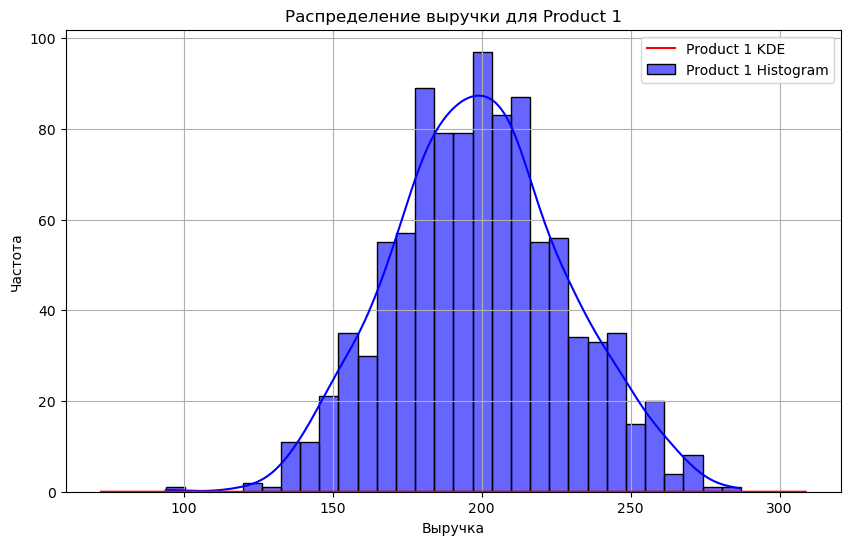

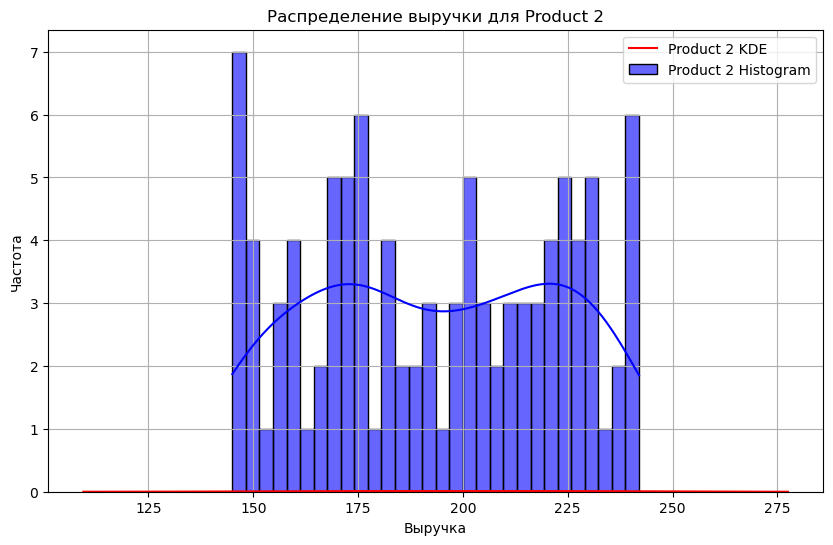

In [25]:
def plot_distribution(data, product_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='blue', alpha=0.6, label=f'{product_name} Histogram')
    sns.kdeplot(data, color='red', label=f'{product_name} KDE')
    plt.title(f"Распределение выручки для {product_name}")
    plt.xlabel("Выручка")
    plt.ylabel("Частота")
    plt.legend()
    plt.grid(True)
    plt.show()

# Построение графиков для каждого продукта
plot_distribution(product1, "Product 1")
plot_distribution(product2, "Product 2")

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [27]:
range1 = np.ptp(product1)  # Размах для product1 (max - min)
range2 = np.ptp(product2)  # Размах для product2 (max - min)

# Вывод результатов размаха
print(f"Product 1 - Range: {range1}")
print(f"Product 2 - Range: {range2}")

# Сравнение размаха и стандартного отклонения
print("\nСравнение размаха и стандартного отклонения:")
print(f"Product 1 - Размах: {range1}, Стандартное отклонение: {std1}")
print(f"Product 2 - Размах: {range2}, Стандартное отклонение: {std2}")

# Ответ на вопрос
print("\nВопрос: \nСходится ли разница в размахах и разница в стандартных отклонениях?\n")
if (range1 > range2 and std1 > std2) or (range1 < range2 and std1 < std2):
    print("Ответ: \nРазница в размахах и стандартных отклонениях сходится, что указывает на соответствие разброса.")
else:
    print("Ответ: \nРазница в размахах и стандартных отклонениях не сходится, что может быть связано с выбросами или неравномерным распределением.")

Product 1 - Range: 193
Product 2 - Range: 97

Сравнение размаха и стандартного отклонения:
Product 1 - Размах: 193, Стандартное отклонение: 28.808372278095014
Product 2 - Размах: 97, Стандартное отклонение: 29.738082240681482

Вопрос: 
Сходится ли разница в размахах и разница в стандартных отклонениях?

Ответ: 
Разница в размахах и стандартных отклонениях не сходится, что может быть связано с выбросами или неравномерным распределением.


**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [35]:
def calculate_iqr(data):
    q1 = np.percentile(data, 25)  # Первый квартиль (25%)
    q3 = np.percentile(data, 75)  # Третий квартиль (75%)
    iqr = q3 - q1  # Межквартильный размах
    return q1, q3, iqr

# Вычисление IQR для обоих продуктов
q1_1, q3_1, iqr1 = calculate_iqr(product1)
q1_2, q3_2, iqr2 = calculate_iqr(product2)

# Удаление выбросов (значения за пределами [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
def remove_outliers(data, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

product1_cleaned = remove_outliers(product1, q1_1, q3_1, iqr1)
product2_cleaned = remove_outliers(product2, q1_2, q3_2, iqr2)

# Подготовка компактного вывода
print(f"Product 1 - Q1: {q1_1}, Q3: {q3_1}, IQR: {iqr1}")
print(f"Product 2 - Q1: {q1_2}, Q3: {q3_2}, IQR: {iqr2}")
print(f"\nProduct 1 - Количество выбросов: {len(product1) - len(product1_cleaned)}")
print(f"Product 2 - Количество выбросов: {len(product2) - len(product2_cleaned)}")

# Общий вывод
if len(product1_cleaned) < len(product1):
    print("\nProduct 1 содержит выбросы, которые могут влиять на разброс данных.")
else:
    print("\nProduct 1 не содержит выбросов.")

if len(product2_cleaned) < len(product2):
    print("Product 2 содержит выбросы, которые могут влиять на разброс данных.")
else:
    print("Product 2 не содержит выбросов.\n")

Product 1 - Q1: 179.0, Q3: 217.25, IQR: 38.25
Product 2 - Q1: 170.0, Q3: 221.0, IQR: 51.0

Product 1 - Количество выбросов: 4
Product 2 - Количество выбросов: 0

Product 1 содержит выбросы, которые могут влиять на разброс данных.
Product 2 не содержит выбросов.



**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

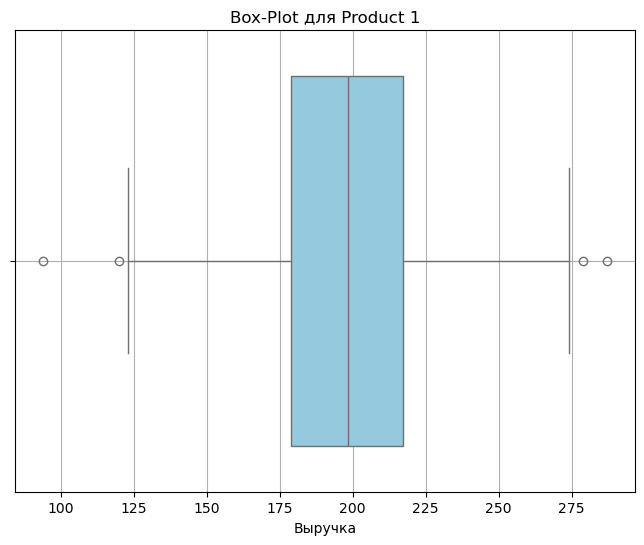


Для Product 1 выбросы начинаются за пределами:
Нижняя граница: 121.625
Верхняя граница: 274.625



In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=product1, color="skyblue")
plt.title("Box-Plot для Product 1")
plt.xlabel("Выручка")
plt.grid(True)
plt.show()

# Расчёт пределов для выбросов
q1_1 = np.percentile(product1, 25)
q3_1 = np.percentile(product1, 75)
iqr1 = q3_1 - q1_1
lower_bound_1 = q1_1 - 1.5 * iqr1
upper_bound_1 = q3_1 + 1.5 * iqr1

# Вывод границ выбросов
print(f"\nДля Product 1 выбросы начинаются за пределами:")
print(f"Нижняя граница: {lower_bound_1}")
print(f"Верхняя граница: {upper_bound_1}\n")

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

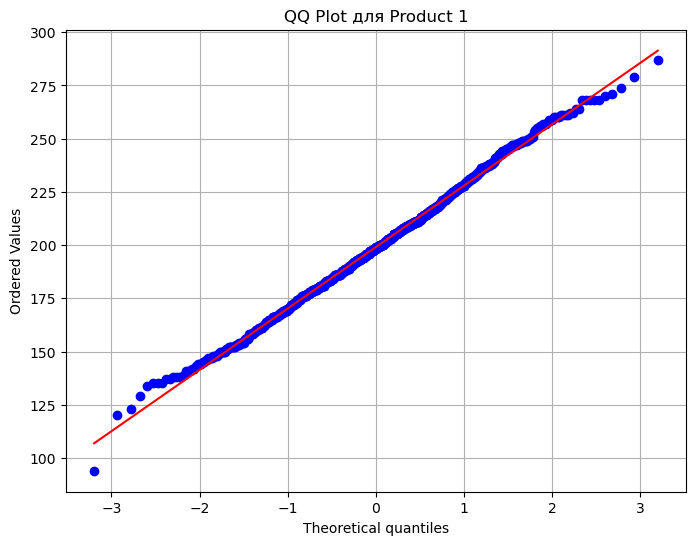

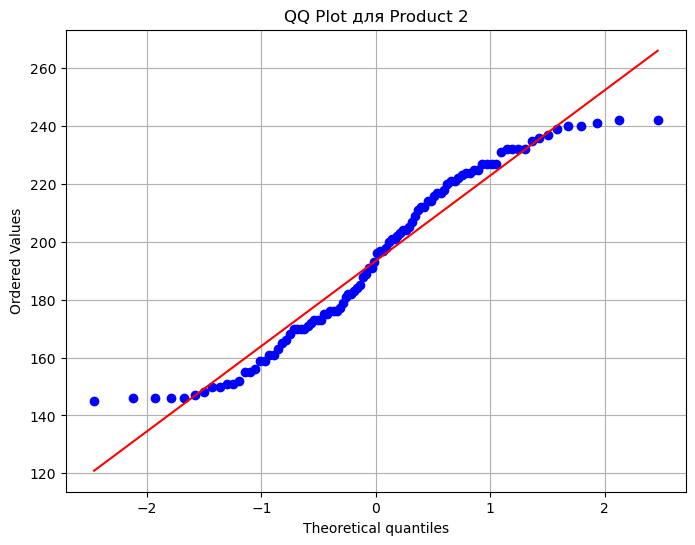

Результаты теста Шапиро-Уилка (проверка на нормальность):
Product 1 - p-value: 0.1647841683689703
Product 2 - p-value: 0.000328506833497194

Распределение Product 1 можно считать нормальным.
Распределение Product 2 не является нормальным.

Анализ распределения Product 2:
Значений ниже среднего минус стандартное отклонение: 20
Значений выше среднего плюс стандартное отклонение: 22

Рекомендации для нормализации:
- Уменьшить количество выбросов (очень высоких или низких значений).
- Добавить больше значений вокруг среднего, чтобы выровнять распределение.


In [46]:
import scipy.stats as stats
from scipy.stats import shapiro

# Функция для построения QQ plot
def plot_qq(data, product_name):
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ Plot для {product_name}")
    plt.grid(True)
    plt.show()

# Построение QQ plot для обоих продуктов
plot_qq(product1, "Product 1")
plot_qq(product2, "Product 2")

# Тест Шапиро-Уилка для проверки нормальности
shapiro_test_1 = shapiro(product1)
shapiro_test_2 = shapiro(product2)

print("Результаты теста Шапиро-Уилка (проверка на нормальность):")
print(f"Product 1 - p-value: {shapiro_test_1.pvalue}")
print(f"Product 2 - p-value: {shapiro_test_2.pvalue}")

if shapiro_test_1.pvalue > 0.05:
    print("\nРаспределение Product 1 можно считать нормальным.")
else:
    print("Распределение Product 1 не является нормальным.")

if shapiro_test_2.pvalue > 0.05:
    print("Распределение Product 2 можно считать нормальным.")
else:
    print("Распределение Product 2 не является нормальным.")

# Анализ отклонений от нормальности для Product 2
def analyze_deviation_from_normal(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    
    # Значения ниже и выше одной стандартной ошибки от среднего
    below_mean = [x for x in data if x < mean - std_dev]
    above_mean = [x for x in data if x > mean + std_dev]
    
    return below_mean, above_mean

below_mean_2, above_mean_2 = analyze_deviation_from_normal(product2)

print("\nАнализ распределения Product 2:")
print(f"Значений ниже среднего минус стандартное отклонение: {len(below_mean_2)}")
print(f"Значений выше среднего плюс стандартное отклонение: {len(above_mean_2)}")

print("\nРекомендации для нормализации:")
print("- Уменьшить количество выбросов (очень высоких или низких значений).")
print("- Добавить больше значений вокруг среднего, чтобы выровнять распределение.")

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

Нарисуйте kdeplot нового стандартного распределения

Первые 10 значений Product 1 в стандартном нормальном распределении:
[-0.1077117433101013, 0.6559551444830738, -0.038287480783449034, 0.8295158007997044, -1.1837878124732115, -0.5936815809966672, 2.0097282637527933, 0.5171066194297692, -0.07299961204677517, 1.8014554761728363]


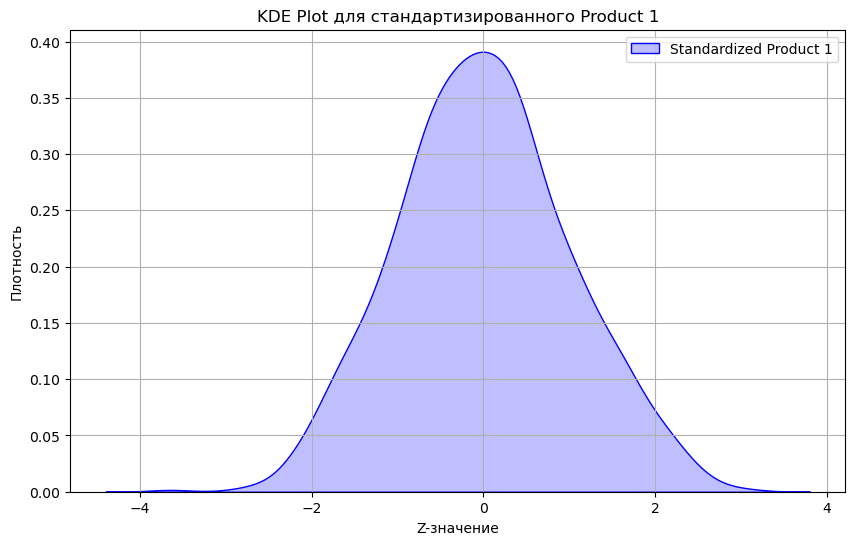

In [49]:
# Среднее и стандартное отклонение для Product 1
mean1 = np.mean(product1)
std1 = np.std(product1, ddof=1)

# Преобразование значений в стандартное нормальное распределение
standardized_product1 = [(x - mean1) / std1 for x in product1]

# Вывод первых нескольких преобразованных значений
print("Первые 10 значений Product 1 в стандартном нормальном распределении:")
print(standardized_product1[:10])

# Построение kdeplot для нового распределения
plt.figure(figsize=(10, 6))
sns.kdeplot(standardized_product1, color='blue', fill=True, label="Standardized Product 1")
plt.title("KDE Plot для стандартизированного Product 1")
plt.xlabel("Z-значение")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True)
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

In [53]:
import scipy.stats as stats

# Часть 1: Точка, слева от которой будет 1% вероятности
mean1 = np.mean(product1)  # Среднее для Product 1
std1 = np.std(product1, ddof=1)  # Стандартное отклонение для Product 1

# Расчёт точки 1%
left_tail_point = stats.norm.ppf(0.01, loc=mean1, scale=std1)
print(f"Точка, слева от которой 1% вероятности распределения Product 1: {left_tail_point:.2f}")

# Часть 2: Преобразование значения 94 в z-оценку
value = 94
z_score = (value - mean1) / std1
print(f"\nЗначение {value} преобразуется в z-оценку: {z_score:.2f}")

# Анализ
print("\nАнализ:")
if z_score < stats.norm.ppf(0.01):
    print(f"Значение {value} ({z_score:.2f}) находится левее точки 1% ({stats.norm.ppf(0.01):.2f}) стандартного нормального распределения.\n")
else:
    print(f"Значение {value} ({z_score:.2f}) находится правее точки 1% ({stats.norm.ppf(0.01):.2f}) стандартного нормального распределения.\n")

Точка, слева от которой 1% вероятности распределения Product 1: 132.08

Значение 94 преобразуется в z-оценку: -3.65

Анализ:
Значение 94 (-3.65) находится левее точки 1% (-2.33) стандартного нормального распределения.



**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

Подсчитайте 95% доверительный интервал

In [66]:
import scipy.stats as stats
import numpy as np

# Данные для Product 2
mean2 = np.mean(product2)  # Среднее значение для Product 2
std2 = np.std(product2, ddof=1)  # Стандартное отклонение для Product 2
n2 = len(product2)  # Размер выборки для Product 2

# Часть 1: Точечная оценка средней выручки
print(f"Точечная оценка средней выручки для Product 2: {mean2:.2f}\n")

# Часть 2: 95% доверительный интервал
confidence = 0.95
alpha = 1 - confidence
t_critical = stats.t.ppf(1 - alpha / 2, df=n2 - 1)  # Критическое t-значение
margin_of_error = t_critical * (std2 / np.sqrt(n2))  # Погрешность

ci_lower = mean2 - margin_of_error
ci_upper = mean2 + margin_of_error

print(f"95% доверительный интервал для средней выручки Product 2: [{ci_lower:.2f}, {ci_upper:.2f}]")

Точечная оценка средней выручки для Product 2: 193.50

95% доверительный интервал для средней выручки Product 2: [187.60, 199.40]


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

Какой это был типа АБ теста?

In [62]:
from scipy.stats import ttest_1samp

# Данные
mean_hypothesis = 197.5  # Среднее значение гипотезы

# Проведение одностороннего t-теста
t_stat, p_value = ttest_1samp(product1, mean_hypothesis)

# Так как мы проверяем, что средняя выручка выше 197.5, делим p-value на 2
one_tailed_p_value = p_value / 2

# Вывод результатов
print(f"t-статистика: {t_stat:.2f}\n")
print(f"Одностороннее p-value: {one_tailed_p_value:.4f}\n")

# Проверка на уровне значимости 5%
alpha = 0.05
if one_tailed_p_value < alpha and t_stat > 0:
    print("Результат:\nОтклоняем нулевую гипотезу. Средняя выручка продукта 1 выше 197.5.")
else:
    print("Результат:\nНе удалось отклонить нулевую гипотезу. Нет доказательств, что средняя выручка продукта 1 выше 197.5.")

# Ответ на второй вопрос
print("\nТип теста:\nЭто был односторонний t-тест, так как проверялась гипотеза, что средняя выручка больше заданного значения.\n")

t-статистика: 1.76

Одностороннее p-value: 0.0394

Результат:
Отклоняем нулевую гипотезу. Средняя выручка продукта 1 выше 197.5.

Тип теста:
Это был односторонний t-тест, так как проверялась гипотеза, что средняя выручка больше заданного значения.



**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [63]:
from scipy.stats import ttest_ind

# Проведение двухвыборочного t-теста
t_stat, p_value = ttest_ind(product1, product2)

# Вывод результатов
print(f"t-статистика: {t_stat:.2f}\n")
print(f"p-value: {p_value:.4f}\n")

# Проверка гипотезы на уровне значимости 5%
alpha = 0.05
if p_value < alpha:
    print("Результат:\nОтклоняем нулевую гипотезу. Средние выручки у продуктов 1 и 2 различны.")
else:
    print("Результат:\nНе удалось отклонить нулевую гипотезу. Нет доказательств, что средние выручки у продуктов 1 и 2 различны.")

t-статистика: 1.85

p-value: 0.0647

Результат:
Не удалось отклонить нулевую гипотезу. Нет доказательств, что средние выручки у продуктов 1 и 2 различны.
